In [1]:
# Import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import urllib.request # to import images from dataset
import sys

from sklearn.model_selection import train_test_split
# Import Neural Network and PyTorch Libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as f
import torch.optim as optim

import torchvision
from torchvision.transforms import v2
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights
import torch.optim.lr_scheduler as lr_scheduler

import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


In [62]:
df = pd.read_csv('/kaggle/input/fakeddit/my_dataframe_part3.csv')


In [63]:
df.shape

(10000, 13)

In [64]:
df, df_backup = train_test_split(
    df ,
    test_size=0.001,
    shuffle=True,
    # To maintain percentage of samples per class as given by original dataset
    stratify=df["6_way_label"],
    random_state=42
)

In [65]:
df.shape

(9990, 13)

In [66]:
# Reset indexes as we are now working with a smaller sample of original dataset
df.reset_index(drop=True, inplace=True)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,upvote_ratio,6_way_label
0,buckshotlafunk,parents of earth vaccination poster psa,1.368310e+09,i.imgur.com,True,1e5fya,https://external-preview.redd.it/uQy0VT_hVfUA5...,NaN,9.0,115,propagandaposters,0.95,5
1,Tellyouwhatguys,this guy looks so happy,1.379396e+09,i.imgur.com,True,1mk0gb,https://external-preview.redd.it/Jz0mR5HZzTyxP...,NaN,0.0,7,pareidolia,1.00,2
2,thatwyvern,this mall has a button that allows you call th...,1.562505e+09,i.redd.it,True,ca6pa2,https://preview.redd.it/f4m1wjytsv831.jpg?widt...,NaN,4.0,23,mildlyinteresting,0.88,0
3,JGisSuperSwag,the ice ball in my brothers beer sealed off th...,1.546886e+09,i.redd.it,True,adkmsd,https://preview.redd.it/v4cvr248p1921.jpg?widt...,NaN,9.0,28,mildlyinteresting,0.89,0
4,Genericandhere,resistance win when one of her students wore a...,1.534481e+09,resistancehole.clickhole.com,True,97zee7,https://external-preview.redd.it/LP0SCfFJB4ttf...,NaN,0.0,56,theonion,0.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,APimpNamedNizram,unamused dog on thanksgiving,1.480396e+09,i.imgur.com,True,5fgts8,https://external-preview.redd.it/sOv2PhtCYDAFh...,NaN,21.0,45,photoshopbattles,0.85,0
9986,ipreferhotdog_z,this tiny carrot that came with the store bundle,1.561245e+09,i.imgur.com,True,c3w1kc,https://external-preview.redd.it/yxf55Wn57K2lI...,NaN,9.0,63,mildlyinteresting,0.91,0
9987,joejankers,a limerick about batman parody,1.505913e+09,youtu.be,True,71axgs,https://external-preview.redd.it/KNqZQCJicciUL...,NaN,0.0,2,satire,1.00,1
9988,Jozhus,step aside boys,1.390296e+09,NaN,True,ceuyh4p,http://i.imgur.com/uqw7UnX.jpg,1vqpsm,NaN,16,psbattle_artwork,NaN,4


In [67]:
print(df['clean_title'].isnull().sum())
print(df['id'].isnull().sum())
print(df['hasImage'].isnull().sum())

# Check for how many rows the column hasImage would be False
print(df['hasImage'].value_counts())

0
0
0
hasImage
True    9990
Name: count, dtype: int64


<Axes: title={'center': '6_way_label'}, ylabel='Frequency'>

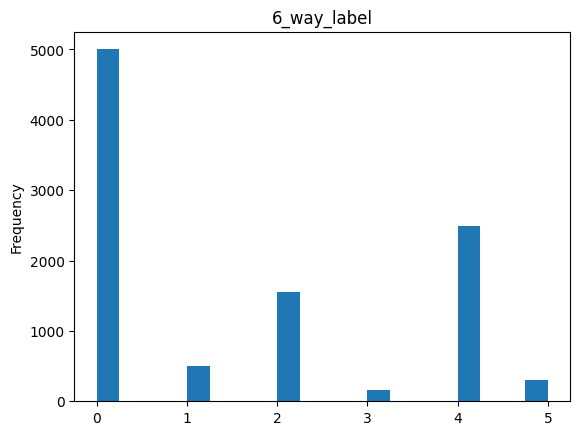

In [68]:
from matplotlib import pyplot as plt
df['6_way_label'].plot(kind='hist', bins=20, title='6_way_label')

(469, 320, 3)


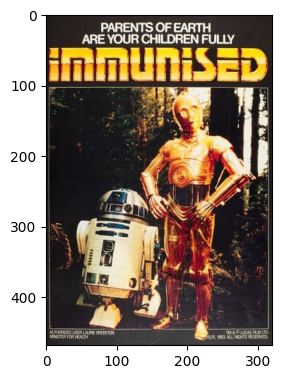

(428, 320, 3)


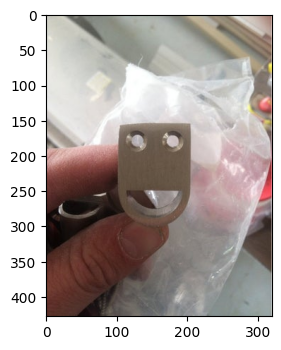

(427, 320, 3)


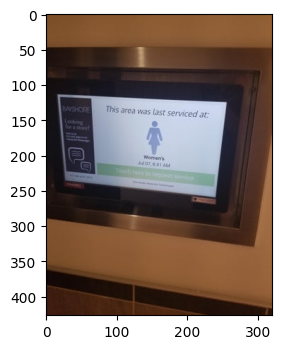

(427, 320, 3)


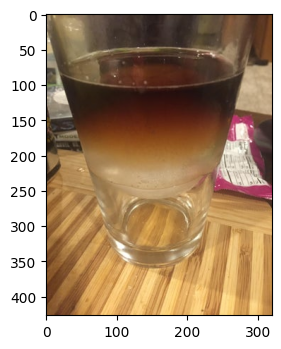

(180, 320, 3)


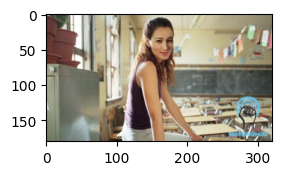

In [69]:
# Plotting images to test download
for i in range(5):
    path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/" + df["id"][i] + ".jpg"

    im= np.array(Image.open(path))

    print(im.shape)
    ax= plt.subplot(121)
    ax.imshow(im)

    plt.show()

In [70]:
def validate_images(directory):
    corrupted_files = []

    # Walk through directory and sub-directories
    for index, row in df.iterrows():
      image_path = "/kaggle/input/fakeddit-50k/fakeddit_small_img/" + row["id"] + ".jpg"
      try:
          with Image.open(image_path) as img:
              img.verify()
      except Exception as e:
          corrupted_files.append(image_path)
          print(f"Error with {image_path}: {e}")
          df.drop(index = index, axis = 0, inplace = True)

    return corrupted_files

# Example usage:
directory = "/kaggle/input/fakeddit-50k/fakeddit_small_img/"
corrupted_images = validate_images(directory)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")
df.reset_index(drop=True, inplace=True)

Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/c90vp0j.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/c90vp0j.jpg'
Error with /kaggle/input/fakeddit-50k/fakeddit_small_img/cexapep.jpg: cannot identify image file '/kaggle/input/fakeddit-50k/fakeddit_small_img/cexapep.jpg'
Found 2 corrupted images.


In [71]:
df.shape

(9988, 13)

In [72]:
##Changing images
import os
from PIL import Image
from torchvision import transforms as v2

# Define the desired size
new_size = (256, 256)

# Create a folder to save resized images
save_dir = "/kaggle/working/resized_images"
os.makedirs(save_dir, exist_ok=True)

# Resize and save each image
for index, row in df.iterrows():
    image_id = row["id"]
    image_path = f"/kaggle/input/fakeddit-50k/fakeddit_small_img/{image_id}.jpg"

    try:
        image = Image.open(image_path).convert("RGB")
        resize_transform = v2.Resize(new_size)
        resized_image = resize_transform(image)

        # Save to working directory
        save_path = os.path.join(save_dir, f"{image_id}.jpg")
        resized_image.save(save_path)
    except Exception as e:
        print(f"Error processing {image_id}: {e}")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [73]:
#Checking number of images in the directory
import os

# Define your image folder path
image_dir = "/kaggle/working/resized_images"

# Common image extensions
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff", ".webp")

# Count
image_count = len([file for file in os.listdir(image_dir) if file.lower().endswith(image_extensions)])

print(f"Total images: {image_count}")


Total images: 29954


(256, 256, 3)


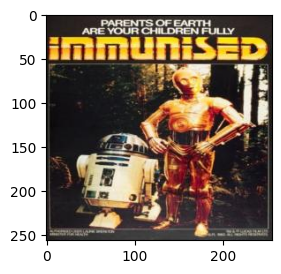

(256, 256, 3)


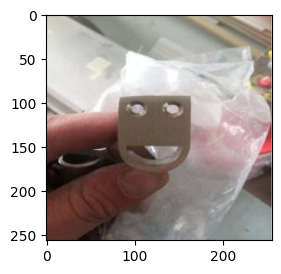

(256, 256, 3)


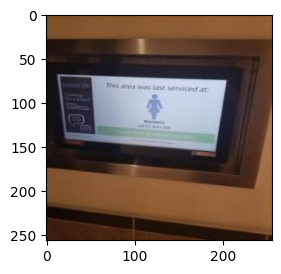

(256, 256, 3)


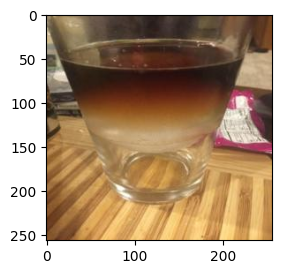

(256, 256, 3)


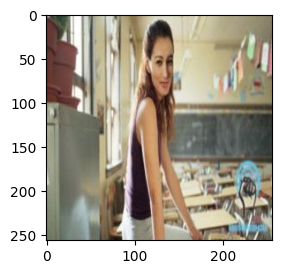

In [75]:
# Plotting images to test resize
for i in range(5):
    path = "/kaggle/working/resized_images/" + df["id"][i] + ".jpg"

    im= np.array(Image.open(path))

    print(im.shape)
    ax= plt.subplot(121)
    ax.imshow(im)

    plt.show()

In [16]:
import torch
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = BertModel.from_pretrained(model_name, output_hidden_states = True)

# Put the model in evaluation mode, which turns off dropout regularization which is used in training.
bert_model.eval()

2025-04-21 08:32:49.890422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745224370.136328      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745224370.207463      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [17]:
def get_bert_embedding(text):
    # Tokenize input text and get token IDs and attention mask
    inputs = tokenizer.encode_plus(text, add_special_tokens = True, return_tensors='pt', max_length=80, truncation=True, padding='max_length')

    return inputs['input_ids'].squeeze(0), inputs['attention_mask'].squeeze(0)

# Testing embedding
text = "This is an example Reddit submission title."
input_ids, attention_mask = get_bert_embedding(text)
print(input_ids.shape)
print(attention_mask.shape)
# print(embedding)

torch.Size([80])
torch.Size([80])


In [50]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.15, stratify=df["6_way_label"])
df_test, df_val = train_test_split(df_test, test_size=0.15, stratify=df_test["6_way_label"])

In [51]:
df_train.shape

(8487, 13)

In [20]:
class FakedditDataset(Dataset):
    def __init__(self, df, text_field="clean_title", label_field="6_way_label", image_id="id"):
        self.df = df.reset_index(drop=True)
        self.text_field = text_field
        self.label_field = label_field
        self.image_id = image_id

        self.img_size = 256
        # Using the pre-calculated ImageNet mean and std values for normalization
        self.mean, self.std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

        self.transform_func = v2.Compose(
                [   v2.Resize(256),
                    v2.ToTensor(),
                    
                    v2.Normalize(self.mean, self.std)
                    ])

    def __getitem__(self, index):
        text = str(self.df.at[index, self.text_field])
        label = self.df.at[index, self.label_field]
        img_path = "/kaggle/working/resized_images/" + self.df.at[index, self.image_id] + ".jpg"

        image = Image.open(img_path)
        img = self.transform_func(image)

        input_ids, attention_mask = get_bert_embedding(text)

        return input_ids, attention_mask, label, img

    def __len__(self):
        return self.df.shape[0]


In [52]:
train_dataset = FakedditDataset(df_train)
test_dataset = FakedditDataset(df_test)
val_dataset = FakedditDataset(df_val)

In [53]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

print(len(train_loader))

# Verifying dataset was created accurately
input_ids, attention_mask, label, img = next(iter(train_loader))
print(input_ids.shape, attention_mask.shape, label.shape, img.shape)

1061
torch.Size([8, 80]) torch.Size([8, 80]) torch.Size([8]) torch.Size([8, 3, 256, 256])


In [23]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


In [54]:
labels = df_train['6_way_label'].to_numpy()

In [76]:
import torch
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'labels' is a list of all labels in the dataset
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, save_dir='./model_checkpoints'):
    early_stopping = EarlyStopping(patience=5, verbose=True)
    
    # Create directory for saving models if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for input_ids, attention_mask, label, img in train_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            label = label.to(device)
            img = img.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(img, input_ids, attention_mask)
            loss = criterion(outputs, label)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * img.size(0)

        # Validating model and ensuring loss is decreasing     
        model.eval()
        val_loss = 0.0
        correct_preds = 0
        with torch.no_grad():
            for input_ids, attention_mask, label, img in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                label = label.to(device)
                img = img.to(device)

                outputs = model(img, input_ids, attention_mask)
                loss = criterion(outputs, label)
                val_loss += loss.item() * img.size(0)

                _, preds = torch.max(outputs, 1)
                correct_preds += torch.sum(preds == label)

        val_loss = val_loss / len(val_loader.dataset)
        accuracy = correct_preds.double() / len(val_loader.dataset)
        scheduler.step(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader.dataset):.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

        # Early stopping
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Stopping training.")
            break

        # Save model after every 2 epochs
        if (epoch + 1) % 2 == 0:
            checkpoint_path = f"{save_dir}/model_epoch_3{epoch+1}.pth"
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Model saved at {checkpoint_path}")


In [77]:
class_weights

tensor([0.3359, 3.3282, 1.0684, 9.3675, 0.6710, 5.2780], device='cuda:0')

In [27]:
from sklearn.metrics import precision_score, recall_score

def evaluate_model(model, test_loader, criterion):
    model.eval()
    val_losses = []
    correct_preds = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for input_ids, attention_mask, label, img in test_loader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            label = label.to(device)
            img = img.to(device)

            outputs = model(
                  image = img,
                  text_input_ids = input_ids,
                  text_attention_mask = attention_mask
            )

            # Final Softmax layer returns class predictions per sample in batch
            # Highest probability value resembles class prediction and is assigned to preds variable
            _, preds = torch.max(outputs, dim=1)
            #print(outputs)

            # Loss is calculated by applying Cross Entropy Loss
            val_loss = criterion(outputs, label)

            # Counting correct model predictions and incrementing correct prediction count
            correct_preds += torch.sum(preds == label)
            print(preds, label)

            # Appending current loss per batch to list of losses per epoch
            val_losses.append(val_loss.item())
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
            

    accuracy = float((correct_preds.double() / len(df_test)) * 100)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    print("\nAccuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)

In [28]:
class BERTResNetClassifier(nn.Module):
    def __init__(self, num_classes=6):

        super(BERTResNetClassifier, self).__init__()

        self.num_classes = num_classes

        # Image processing (ResNet)
        self.image_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

        # Image processing (Fully Connected Layer)
        self.fc_image = nn.Linear(in_features=1000, out_features=num_classes, bias=True)

        # Dropout layer
        self.drop = nn.Dropout(p=0.3)

        # Text processing (using the 768-dimensional BERT arrays)
        self.text_model = BertModel.from_pretrained("bert-base-uncased")

        # Text processing (Fully Connected Layer)
        self.fc_text = nn.Linear(in_features=self.text_model.config.hidden_size, out_features=num_classes, bias=True)

        # Fusion and classification
        self.softmax = nn.Softmax(dim=1)

    def forward(self, image, text_input_ids, text_attention_mask,):
        # Image branch
        x_img = self.image_model(image)
        x_img = self.drop(x_img)
        x_img = self.fc_image(x_img)

        # Text branch
        x_text_last_hidden_states = self.text_model(
            input_ids = text_input_ids,
            attention_mask = text_attention_mask,
            return_dict=False
        )
        x_text_pooled_output = x_text_last_hidden_states[0][:, 0, :]
        x_text = self.drop(x_text_pooled_output)
        x_text = self.fc_text(x_text_pooled_output)

        # Fusion and max merge
        x = torch.max(x_text, x_img)

        # Classification
        #x = self.softmax(x) #-> already applied in crossentropy loss

        return x


In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BERTResNetClassifier(num_classes=6)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 234MB/s]


In [30]:
model.load_state_dict(torch.load("/kaggle/input/multimodall/pytorch/default/1/modellast.pth"))

/tmp/ipykernel_31/2432559487.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/input/multimodall/pytorch/default/1/modellast.pth"

<All keys matched successfully>

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model= model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, min_lr=1e-6, factor=0.5, patience=1, verbose=True)
num_epochs = 20

In [78]:
train_model(model, train_loader,val_loader, criterion, optimizer, scheduler, num_epochs,save_dir='./model_checkpoints')
#print("\n")
evaluate_model(model, test_loader, criterion)


Epoch 1/20, Training Loss: 0.1122, Validation Loss: 0.9963, Accuracy: 0.8400
Epoch 2/20, Training Loss: 0.0963, Validation Loss: 0.9016, Accuracy: 0.8444
Model saved at ./model_checkpoints/model_epoch_32.pth
Epoch 3/20, Training Loss: 0.0823, Validation Loss: 0.8419, Accuracy: 0.8489
Epoch 4/20, Training Loss: 0.0749, Validation Loss: 1.0423, Accuracy: 0.8489
EarlyStopping counter: 1 out of 5
Model saved at ./model_checkpoints/model_epoch_34.pth
Epoch 5/20, Training Loss: 0.0556, Validation Loss: 0.9808, Accuracy: 0.8356
EarlyStopping counter: 2 out of 5
Epoch 6/20, Training Loss: 0.0558, Validation Loss: 1.0570, Accuracy: 0.8444
EarlyStopping counter: 3 out of 5
Model saved at ./model_checkpoints/model_epoch_36.pth
Epoch 7/20, Training Loss: 0.0509, Validation Loss: 1.3014, Accuracy: 0.8444
EarlyStopping counter: 4 out of 5
Epoch 8/20, Training Loss: 0.0417, Validation Loss: 1.2757, Accuracy: 0.8400
EarlyStopping counter: 5 out of 5
Early stopping triggered. Stopping training.
tensor(

In [79]:
torch.save(model.state_dict(), "./modellast31.pth")